# Загрузка данных

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Урок 14.1 Портфолио банк/bank_clients_transactions.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю snake case

In [3]:
# Функция для преобразования названий столбцов в стиль snake case
def to_snake_case(column_name):
    return column_name.strip().lower().replace(" ", "_")

# Применение функции к названиям столбцов
df.columns = [to_snake_case(col) for col in df.columns]

# Показать результат
print(df.columns)

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount_(inr)'],
      dtype='object')


# Приведение типов данных

In [4]:
# Преобразование колонки transactiondate в тип datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Показать результат
print(df['transactiondate'])

0         2016-02-08
1         2016-02-08
2         2016-02-08
3         2016-02-08
4         2016-02-08
             ...    
1048562   2016-09-18
1048563   2016-09-18
1048564   2016-09-18
1048565   2016-09-18
1048566   2016-09-18
Name: transactiondate, Length: 1048567, dtype: datetime64[ns]


<ipython-input-4-953cd25d0b22>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1048567 non-null  object        
 1   customerid               1048567 non-null  object        
 2   customerdob              1045170 non-null  object        
 3   custgender               1047467 non-null  object        
 4   custlocation             1048416 non-null  object        
 5   custaccountbalance       1046198 non-null  float64       
 6   transactiondate          1048567 non-null  datetime64[ns]
 7   transactiontime          1048567 non-null  int64         
 8   transactionamount_(inr)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 72.0+ MB


# Поиск дублей и пропусков в данных

In [6]:
# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с пропусками
df = df.dropna()

# Исследовательский анализ данных

In [7]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount_(inr)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [8]:
# Подсчет количества уникальных клиентов
unique_customers_count = df['customerid'].nunique()

# Вывод результата
print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 879358


В таблице находится 879358 уникальных клиентов

In [9]:
 # Подсчет количества транзакций
transactions_count = df.shape[0]

# Вывод результата
print(f"Количество транзакций: {transactions_count}")

Количество транзакций: 1041614


Всего было совершено 1041614 транзакций

In [10]:
 # Подсчет количества транзакций для каждого клиента
transactions_per_customer = df['customerid'].value_counts()

# Подсчет среднего количества транзакций на одного клиента
average_transactions_per_customer = transactions_per_customer.mean()

# Вывод результата
print(f"Среднее количество транзакций на одного клиента: {average_transactions_per_customer:.2f}")

Среднее количество транзакций на одного клиента: 1.18


В среднем на одного клиента приходится 1,18 транзакций

<ipython-input-13-d9268abc10ac>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])


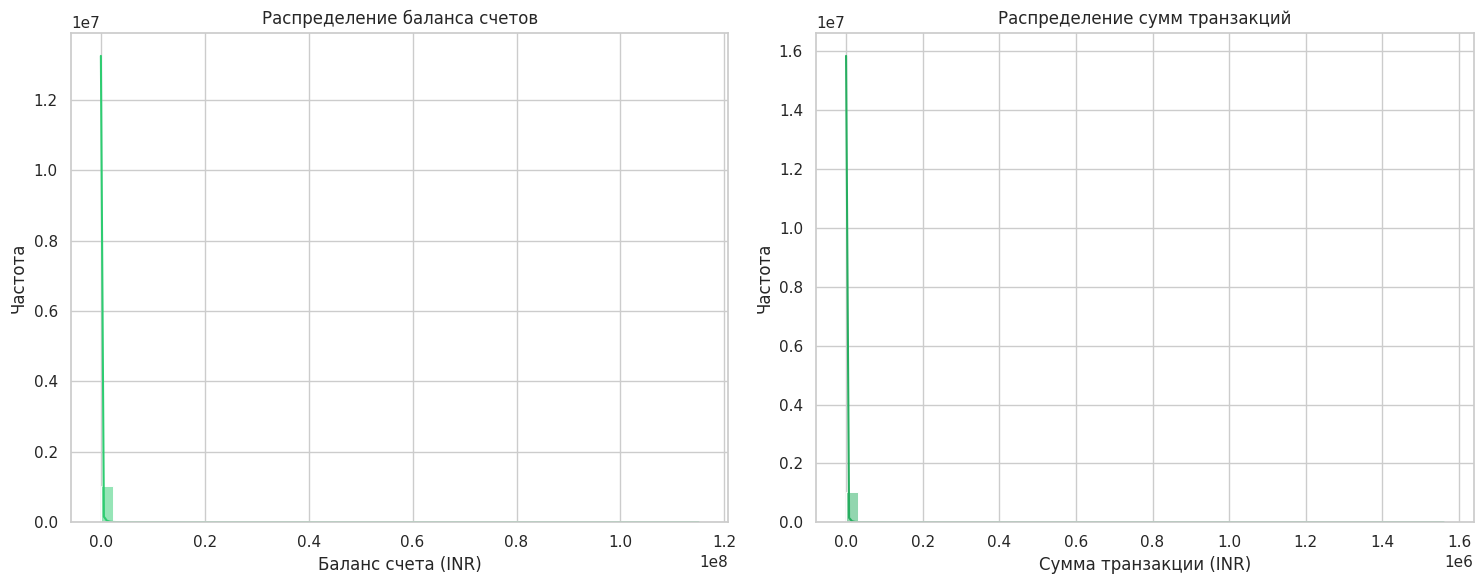

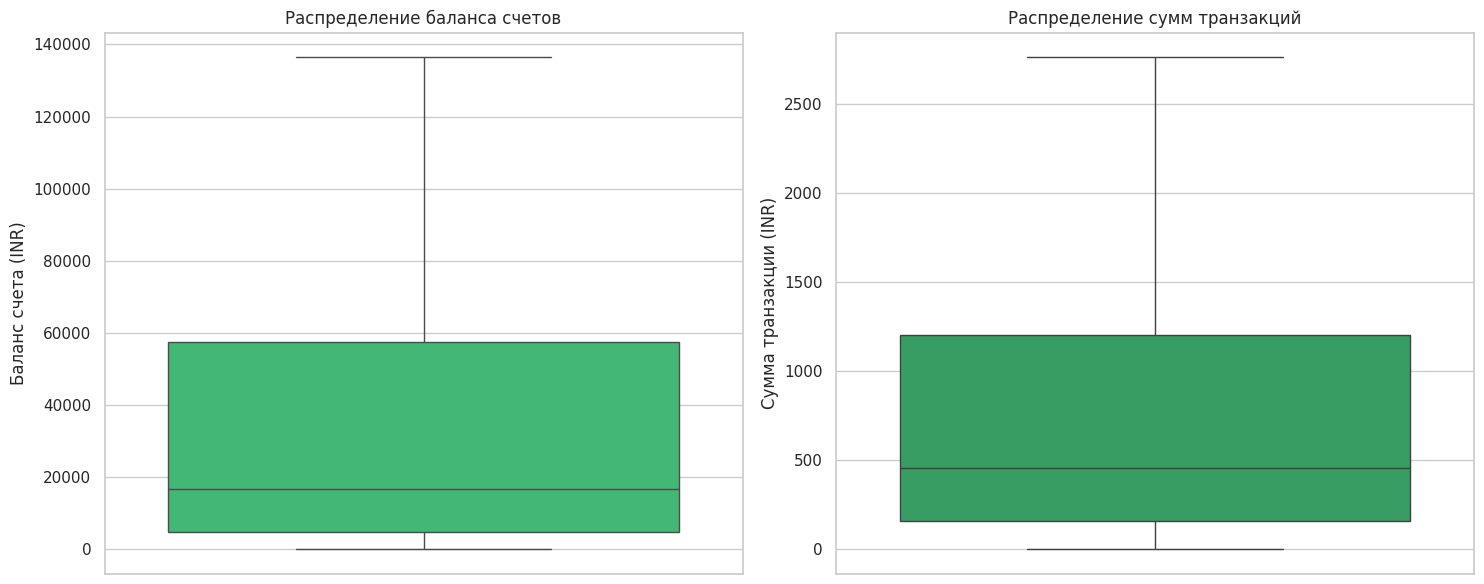


Статистика для баланса счетов:
count    1.041614e+06
mean     1.149986e+05
std      8.467609e+05
min      0.000000e+00
25%      4.728140e+03
50%      1.676852e+04
75%      5.742885e+04
max      1.150355e+08
Name: custaccountbalance, dtype: float64

Статистика для сумм транзакций:
count    1.041614e+06
mean     1.566096e+03
std      6.561464e+03
min      0.000000e+00
25%      1.600000e+02
50%      4.575000e+02
75%      1.200000e+03
max      1.560035e+06
Name: transaction_amount_inr, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Урок 14.1 Портфолио банк/bank_clients_transactions.csv')

# Предобработка данных
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df['transactiondate'] = pd.to_datetime(df['transactiondate'])
df = df.drop_duplicates()
df = df.dropna()

# Переименование колонки для удобства
df = df.rename(columns={'transactionamount_(inr)': 'transaction_amount_inr'})

# Настройка стиля графиков
sns.set_theme(style="whitegrid")
green_palette = ["#2ecc71", "#27ae60", "#1e8449"]

# 1. Гистограммы распределения
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['custaccountbalance'],
             ax=ax[0],
             color=green_palette[0],
             kde=True,
             bins=50)
ax[0].set_title('Распределение баланса счетов')
ax[0].set_xlabel('Баланс счета (INR)')
ax[0].set_ylabel('Частота')

sns.histplot(df['transaction_amount_inr'],
             ax=ax[1],
             color=green_palette[1],
             kde=True,
             bins=50)
ax[1].set_title('Распределение сумм транзакций')
ax[1].set_xlabel('Сумма транзакции (INR)')
ax[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

# 2. Ящики с усами
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(y=df['custaccountbalance'],
            ax=ax[0],
            color=green_palette[0],
            showfliers=False)
ax[0].set_title('Распределение баланса счетов')
ax[0].set_ylabel('Баланс счета (INR)')

sns.boxplot(y=df['transaction_amount_inr'],
            ax=ax[1],
            color=green_palette[1],
            showfliers=False)
ax[1].set_title('Распределение сумм транзакций')
ax[1].set_ylabel('Сумма транзакции (INR)')

plt.tight_layout()
plt.show()

# 3. Статистические характеристики
print("\nСтатистика для баланса счетов:")
print(df['custaccountbalance'].describe())

print("\nСтатистика для сумм транзакций:")
print(df['transaction_amount_inr'].describe())

1. Среднее значение баланса счета составляет 1.14.
2. Среднее значение суммы транзакции 1.56


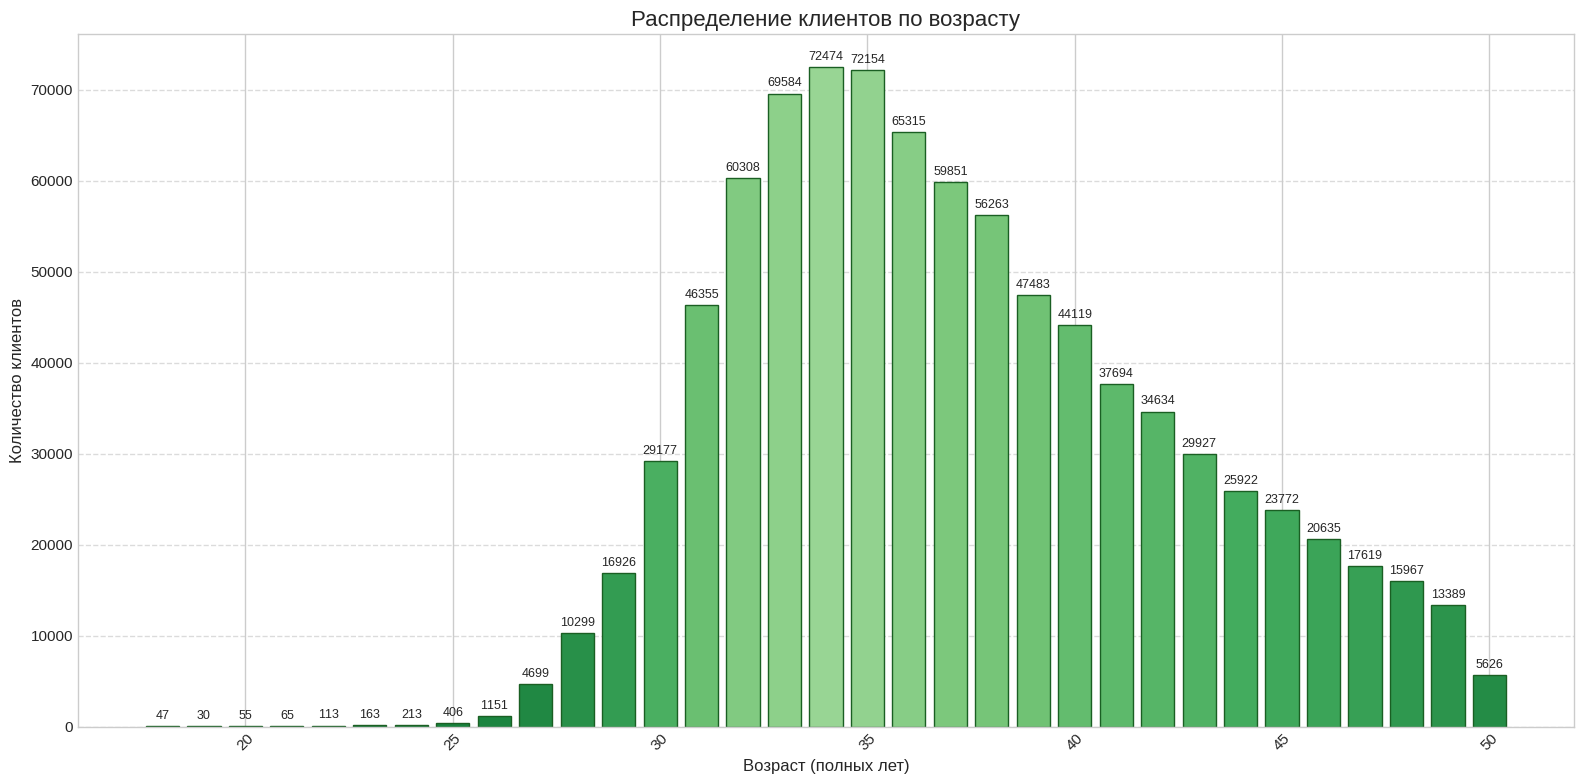

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Установим текущую дату (из контекста: 2025-06-01)
current_date = datetime(2025, 6, 1)

# Рассчитаем возраст клиентов
df['age'] = (current_date - df['customerdob']).dt.days // 365

# Фильтрация нереалистичных возрастов
df = df[(df['age'] >= 18) & (df['age'] <= 100)]

# Группировка по возрасту и подсчет клиентов
age_distribution = df['age'].value_counts().reset_index()
age_distribution.columns = ['age', 'count']

# Сортировка по убыванию количества клиентов
age_distribution = age_distribution.sort_values(by='count', ascending=False)

# Создание цветовой палитры (градиент зеленого)
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(age_distribution)))

# Построение диаграммы
plt.figure(figsize=(16, 8))
bars = plt.bar(age_distribution['age'],
               age_distribution['count'],
               color=colors,
               edgecolor='#1a5f23')

# Подписи значений
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=9)

# Настройка оформления
plt.title('Распределение клиентов по возрасту', fontsize=16)
plt.xlabel('Возраст (полных лет)', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Максимальное количество клиентов в возрасте 33-35 лет

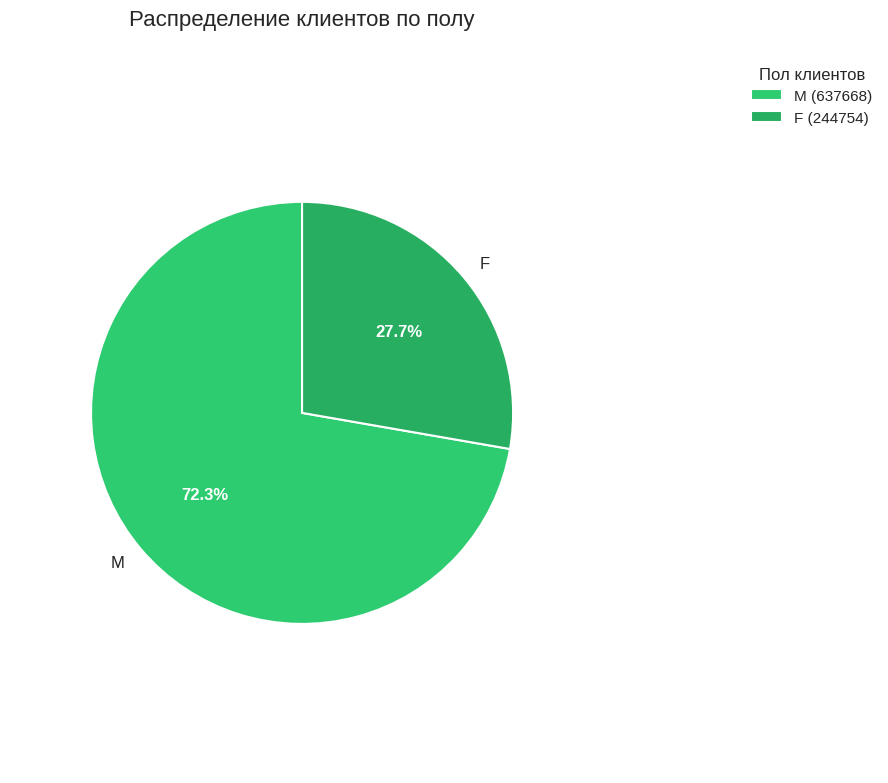

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных
gender_counts = df['custgender'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(10, 8))

# Зеленая палитра (два оттенка для M и F, третий для других)
colors = ['#2ecc71', '#27ae60', '#1e8449', '#196f3d', '#145a32']

# Построение диаграммы с подписями
patches, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(gender_counts)],
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'w', 'linewidth': 1.5}
)

# Улучшение подписей процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Добавление заголовка
plt.title('Распределение клиентов по полу', fontsize=16, pad=20)

# Добавление легенды (опционально)
plt.legend(
    title="Пол клиентов",
    loc="best",
    bbox_to_anchor=(1, 0.5, 0.5, 0.5),
    labels=[f'{label} ({count})' for label, count in zip(gender_counts.index, gender_counts)]
)

# Обеспечиваем круговую форму
plt.axis('equal')

plt.tight_layout()
plt.show()

Большая часть клиентов 72,3% мужчины

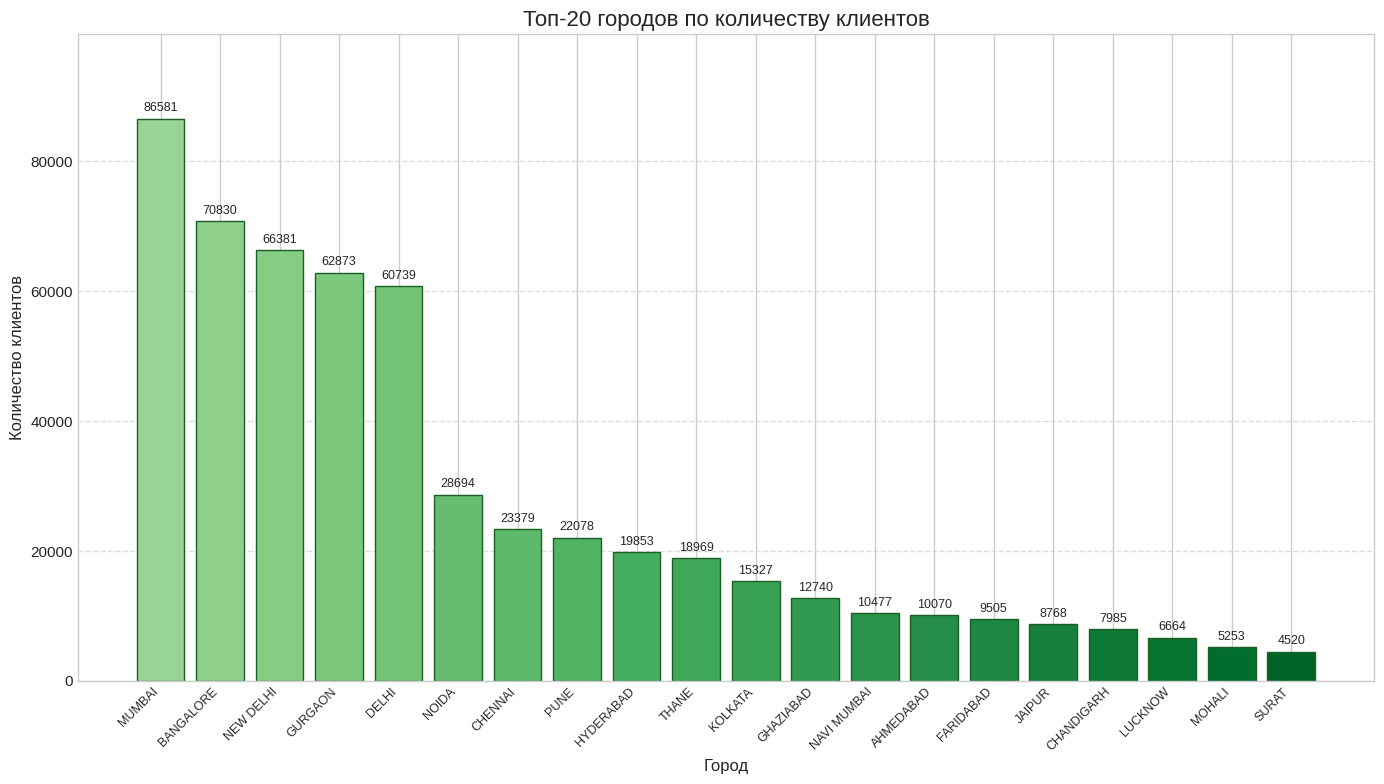

In [29]:
# Оставляем только топ-20 городов
top_locations = location_counts.head(20)

# Создание графика для топ-20
plt.figure(figsize=(14, 8))
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_locations)))

bars = plt.bar(top_locations['location'],
               top_locations['count'],
               color=colors,
               edgecolor='#1a5f23')

# Подписи значений
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center',
                 va='bottom',
                 fontsize=9)

plt.title('Топ-20 городов по количеству клиентов', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(top=top_locations['count'].max() * 1.15)
plt.show()

Наибольшее количество клиентов в Мумбае, на втором и ттретьем местеБангалор и Ньюдели

<ipython-input-33-337848ac5284>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])


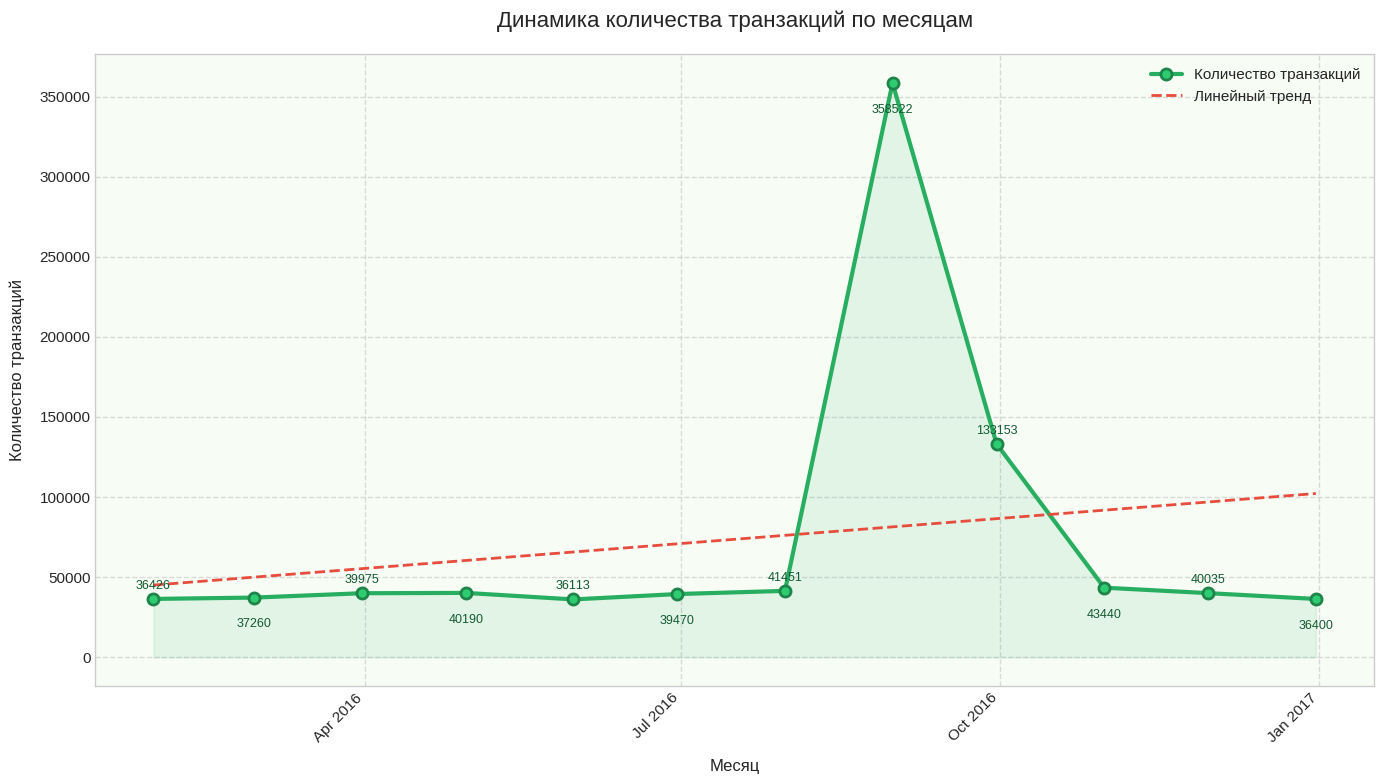

<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress

# Убедимся, что столбец transactiondate в формате datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Создаем временный DataFrame с индексом в виде даты
temp_df = df.set_index('transactiondate')

# Группировка транзакций по месяцам с использованием 'ME' вместо 'M'
monthly_transactions = temp_df.resample('ME')['transactionid'].count().reset_index()
monthly_transactions.columns = ['month', 'transaction_count']

# Создание линейного графика
plt.figure(figsize=(14, 8))

# Основной график
plt.plot(monthly_transactions['month'],
         monthly_transactions['transaction_count'],
         color='#27ae60',
         linewidth=3,
         marker='o',
         markersize=8,
         markerfacecolor='#2ecc71',
         markeredgecolor='#1e8449',
         markeredgewidth=2,
         label='Количество транзакций')

# Заполнение области под графиком
plt.fill_between(monthly_transactions['month'],
                 monthly_transactions['transaction_count'],
                 color='#27ae60',
                 alpha=0.1)

# Линия тренда (опционально)
try:
    x = mdates.date2num(monthly_transactions['month'])
    y = monthly_transactions['transaction_count']
    slope, intercept, _, _, _ = linregress(x, y)
    trend_line = slope * x + intercept

    plt.plot(monthly_transactions['month'], trend_line,
             color='#e74c3c',
             linestyle='--',
             linewidth=2,
             label='Линейный тренд')
except Exception as e:
    print(f"Ошибка построения линии тренда: {e}")

# Настройка формата дат на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Каждые 3 месяца
plt.xticks(rotation=45, ha='right')

# Подписи данных
for i, (date, count) in enumerate(zip(monthly_transactions['month'], monthly_transactions['transaction_count'])):
    offset = 5 if i % 2 == 0 else -15
    plt.annotate(f'{count}',
                 xy=(date, count),
                 xytext=(0, offset),
                 textcoords="offset points",
                 ha='center',
                 va='bottom' if i % 2 == 0 else 'top',
                 fontsize=9,
                 color='#145a32')

# Настройка оформления
plt.title('Динамика количества транзакций по месяцам', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12, labelpad=10)
plt.ylabel('Количество транзакций', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Зеленая цветовая схема для фона
plt.gca().set_facecolor('#f7fcf5')
plt.figure().set_facecolor('#ffffff')

plt.show()

Самое большое количество транзакций было в сентябре

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


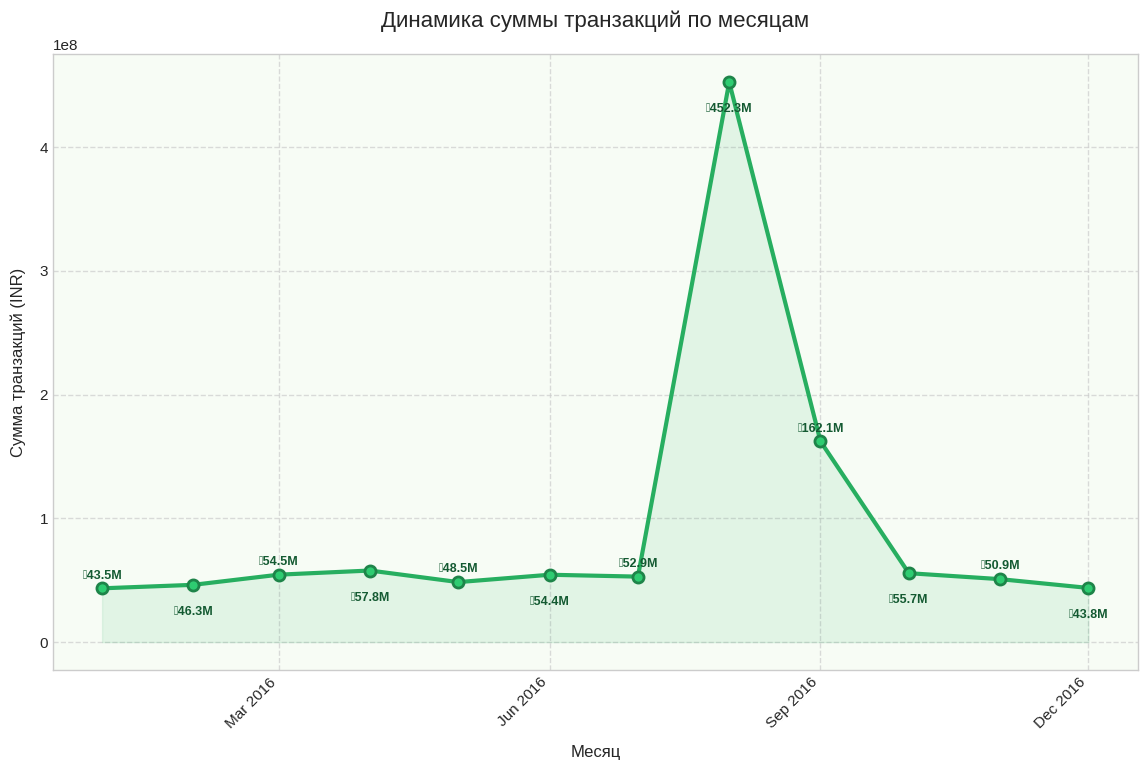

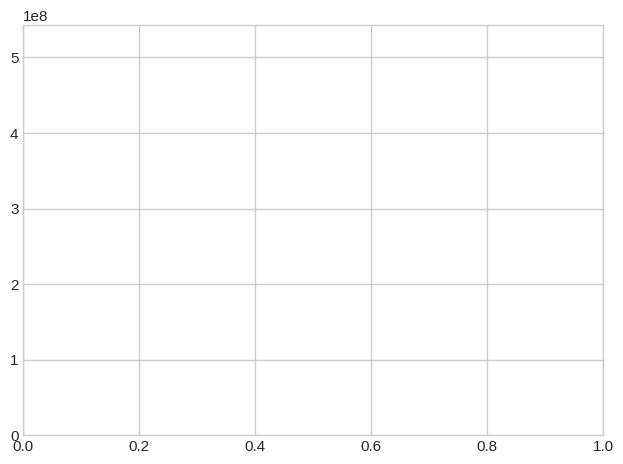

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Преобразование даты (если еще не сделано)
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Создаем столбец с началом месяца
df['month'] = df['transactiondate'].dt.to_period('M').dt.to_timestamp()

# Группировка по месяцам и суммирование транзакций
monthly_amount = df.groupby('month')['transactionamount_(inr)'].sum().reset_index()
monthly_amount.columns = ['month', 'total_amount']

# Создание линейного графика
plt.figure(figsize=(14, 8))

# Построение графика
plt.plot(monthly_amount['month'],
         monthly_amount['total_amount'],
         color='#27ae60',
         linewidth=3,
         marker='o',
         markersize=8,
         markerfacecolor='#2ecc71',
         markeredgecolor='#1e8449',
         markeredgewidth=2)

# Заполнение области под графиком
plt.fill_between(monthly_amount['month'],
                 monthly_amount['total_amount'],
                 color='#27ae60',
                 alpha=0.1)

# Настройка формата дат на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Метки каждые 3 месяца
plt.xticks(rotation=45, ha='right')

# Подписи данных для каждой точки
for i, (date, amount) in enumerate(zip(monthly_amount['month'], monthly_amount['total_amount'])):
    offset = 5 if i % 2 == 0 else -15  # Чередование позиций подписей
    plt.annotate(f'₹{amount/1000000:.1f}M',  # Форматирование в миллионах
                 xy=(date, amount),
                 xytext=(0, offset),
                 textcoords="offset points",
                 ha='center',
                 va='bottom' if i % 2 == 0 else 'top',
                 fontsize=9,
                 color='#145a32',
                 fontweight='bold')

# Настройка оформления
plt.title('Динамика суммы транзакций по месяцам', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12, labelpad=10)
plt.ylabel('Сумма транзакций (INR)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Зеленая цветовая схема для фона
plt.gca().set_facecolor('#f7fcf5')
plt.figure().set_facecolor('#ffffff')

# Автоматическая настройка пределов оси Y
plt.ylim(bottom=0, top=monthly_amount['total_amount'].max() * 1.2)

plt.tight_layout()
plt.show()

Наибольшая сумма выручки была в августе, второе место - сентябрь

<ipython-input-35-005288666c02>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group')['transactionamount_(inr)'].agg(['sum', 'mean', 'count'])
<ipython-input-35-005288666c02>:84: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


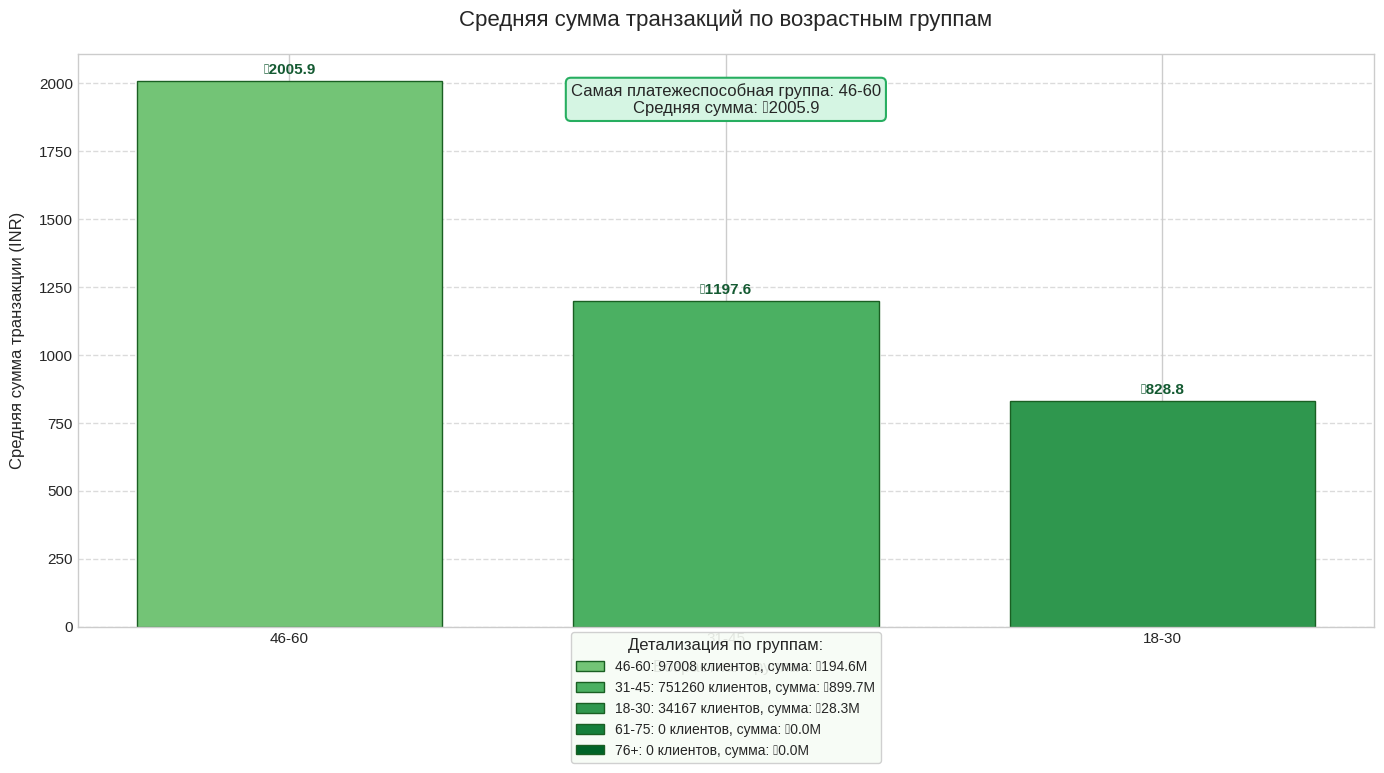

Самая платежеспособная возрастная группа: 46-60
Средняя сумма транзакции: ₹2005.88
Количество клиентов в группе: 97008
Общая сумма транзакций: ₹194.59M


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Текущая дата (из контекста: 2025-06-01)
current_date = datetime(2025, 6, 1)

# Расчет возраста клиентов
df['age'] = (current_date - df['customerdob']).dt.days // 365

# Фильтрация нереалистичных возрастов
df = df[(df['age'] >= 18) & (df['age'] <= 100)]

# Создание возрастных групп с шагом 15 лет
bins = [18, 30, 45, 60, 75, 100]
labels = ['18-30', '31-45', '46-60', '61-75', '76+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Расчет средней суммы транзакций по возрастным группам
age_group_stats = df.groupby('age_group')['transactionamount_(inr)'].agg(['sum', 'mean', 'count'])
age_group_stats = age_group_stats.reset_index()
age_group_stats.columns = ['age_group', 'total_amount', 'avg_amount', 'clients_count']

# Сортировка по средней сумме транзакции (платежеспособности)
age_group_stats_sorted = age_group_stats.sort_values('avg_amount', ascending=False)

# Создание столбчатой диаграммы
plt.figure(figsize=(14, 8))

# Зеленая градиентная палитра
colors = plt.cm.Greens(np.linspace(0.5, 0.9, len(age_group_stats_sorted)))

# Построение диаграммы
bars = plt.bar(age_group_stats_sorted['age_group'],
               age_group_stats_sorted['avg_amount'],
               color=colors,
               edgecolor='#1a5f23',
               width=0.7)

# Подписи значений
for bar, avg_amount in zip(bars, age_group_stats_sorted['avg_amount']):
    height = bar.get_height()
    plt.annotate(f'₹{avg_amount:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center',
                 va='bottom',
                 fontsize=11,
                 fontweight='bold',
                 color='#145a32')

# Настройка оформления
plt.title('Средняя сумма транзакций по возрастным группам', fontsize=16, pad=20)
plt.xlabel('Возрастная группа', fontsize=12, labelpad=10)
plt.ylabel('Средняя сумма транзакции (INR)', fontsize=12, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление информации о самой платежеспособной группе
top_group = age_group_stats_sorted.iloc[0]
plt.annotate(f'Самая платежеспособная группа: {top_group["age_group"]}\nСредняя сумма: ₹{top_group["avg_amount"]:.1f}',
             xy=(0.5, 0.95),
             xycoords='axes fraction',
             ha='center',
             va='top',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="#d5f5e3", ec="#27ae60", lw=1.5))

# Отображение дополнительной статистики в легенде
stats_text = [f"{row['age_group']}: {row['clients_count']} клиентов, сумма: ₹{row['total_amount']/1000000:.1f}M"
              for _, row in age_group_stats_sorted.iterrows()]

plt.legend(bars, stats_text,
           title='Детализация по группам:',
           loc='lower center',
           bbox_to_anchor=(0.5, -0.25),
           ncol=1,
           fontsize=10,
           frameon=True,
           framealpha=0.9,
           facecolor='#f7fcf5')

plt.tight_layout()
plt.show()

# Вывод самой платежеспособной группы
print(f"Самая платежеспособная возрастная группа: {top_group['age_group']}")
print(f"Средняя сумма транзакции: ₹{top_group['avg_amount']:.2f}")
print(f"Количество клиентов в группе: {top_group['clients_count']}")
print(f"Общая сумма транзакций: ₹{top_group['total_amount']/1000000:.2f}M")

Самая платежеспособная группа в возрасте 46-60 лет

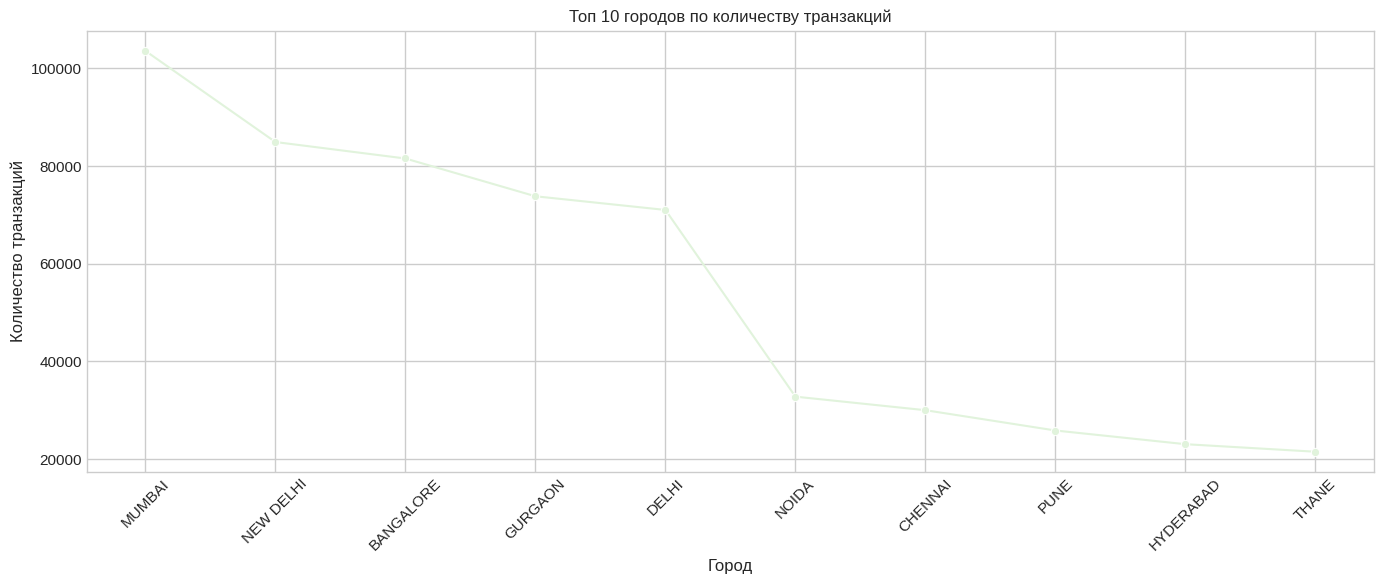

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Урок 14.1 Портфолио банк/bank_clients_transactions.csv')

# Преобразование названий столбцов в стиль snake case
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Подсчет количества транзакций по городам
transactions_per_city = df['custlocation'].value_counts().nlargest(10)

# Установка зеленой цветовой палитры
sns.set_palette("Greens")

# Построение линейного графика динамики количества транзакций по городам
plt.figure(figsize=(14, 6))
sns.lineplot(x=transactions_per_city.index, y=transactions_per_city.values, marker='o')
plt.title('Топ 10 городов по количеству транзакций')
plt.xlabel('Город')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


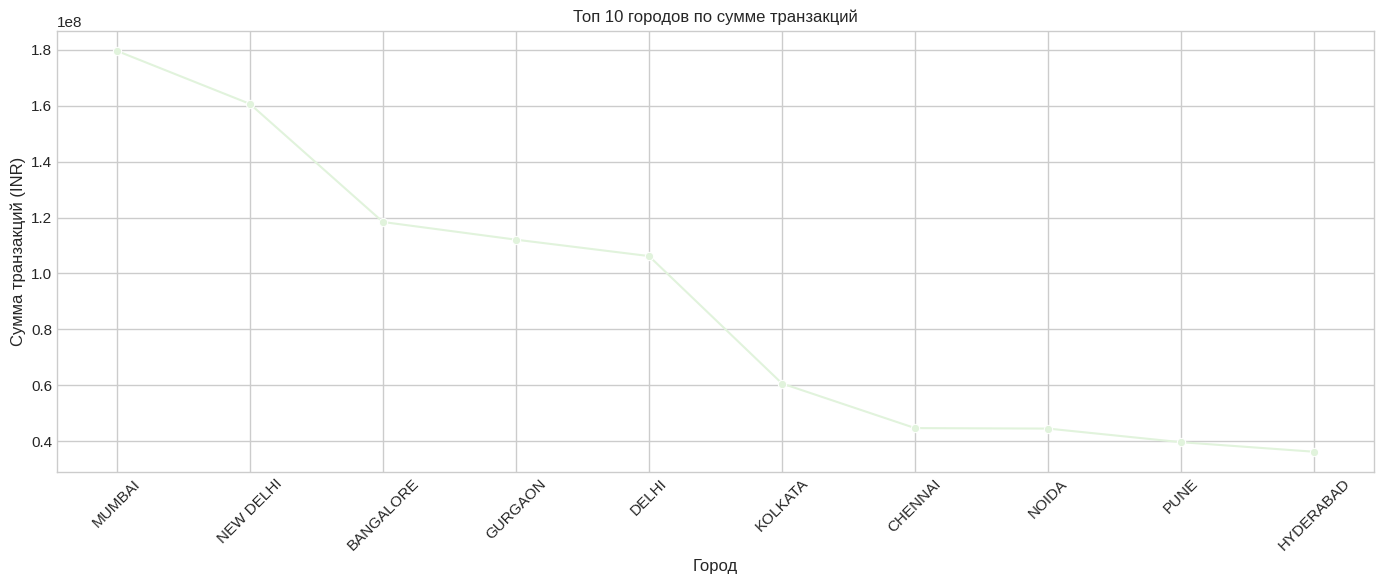

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Урок 14.1 Портфолио банк/bank_clients_transactions.csv')

# Преобразование названий столбцов в стиль snake case
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Группировка данных по городам и подсчет суммы транзакций
transactions_sum_per_city = df.groupby('custlocation')['transactionamount_(inr)'].sum().nlargest(10)

# Установка зеленой цветовой палитры
sns.set_palette("Greens")

# Построение линейного графика динамики суммы транзакций по городам
plt.figure(figsize=(14, 6))
sns.lineplot(x=transactions_sum_per_city.index, y=transactions_sum_per_city.values, marker='o')
plt.title('Топ 10 городов по сумме транзакций')
plt.xlabel('Город')
plt.ylabel('Сумма транзакций (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Максимальные продажи по количеству и сумме в Мумбае, затем Нью-Дели и Бангалор

Среднее время транзакций: 2.62 минут


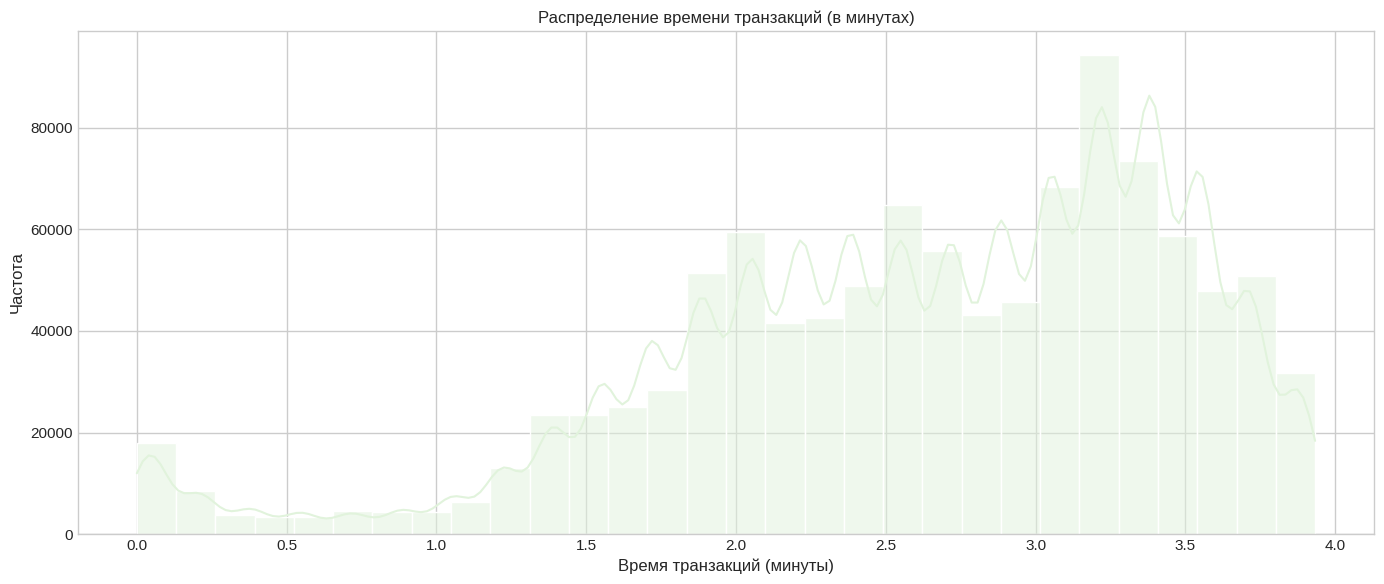

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Урок 14.1 Портфолио банк/bank_clients_transactions.csv')

# Преобразование названий столбцов в стиль snake case
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Перевод времени транзакций из миллисекунд в минуты
df['transactiontime_minutes'] = df['transactiontime'] / (1000 * 60)

# Вычисление среднего времени транзакций
average_transaction_time = df['transactiontime_minutes'].mean()
print(f"Среднее время транзакций: {average_transaction_time:.2f} минут")

# Установка зеленой цветовой палитры
sns.set_palette("Greens")

# Построение гистограммы распределения времени транзакций
plt.figure(figsize=(14, 6))
sns.histplot(df['transactiontime_minutes'], bins=30, kde=True)
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакций (минуты)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


Среднее время транзакции 2.62 минуты. Время транзакции изменяется в интервале от 0 до 4 минут

# Выводы

1.	В таблице находится 879358 уникальных клиентов
2.	Всего было совершено 1041614 транзакций
3.	В среднем на одного клиента приходится 1,18 транзакций
4.	Среднее значение баланса счета составляет 1.14.
5.	Среднее значение суммы транзакции 1.56
6.	Максимальное количество клиентов в возрасте 33-35 лет
7.	Большая часть клиентов 72,3% мужчины
8.	Наибольшее количество клиентов в Мумбае, на втором и третьем месте Бангалор и Нью-Дели
9.	Самое большое количество транзакций было в сентябре
10.	Наибольшая сумма выручки была в августе, второе место – сентябрь
11.	Самая платежеспособная возрастная группа: 46-60
12.	Средняя сумма транзакции: ₹2005.88
13.	Количество клиентов в группе: 97008
14.	Общая сумма транзакций: ₹194.59M
15.	Максимальные продажи по количеству и сумме в Мумбае, затем Нью-Дели и Бангалор
16.	Среднее время транзакции 2.62 минуты. Время транзакции изменяется в интервале от 0 до 4 минут

